<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [14]:
student_number = '403206479'
Name = 'Emadeddin'
Last_Name = 'Rostamian'

# Libraries

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [16]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    np.random.seed(42)
    X = (range_end - range_start) * np.random.random_sample((num_samples,)) + range_start
    y = 0.2*X**6-0.5*X**5+2*X**4-5*X**3+3*X**2-10*X+5+np.random.normal(0,10,num_samples)
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

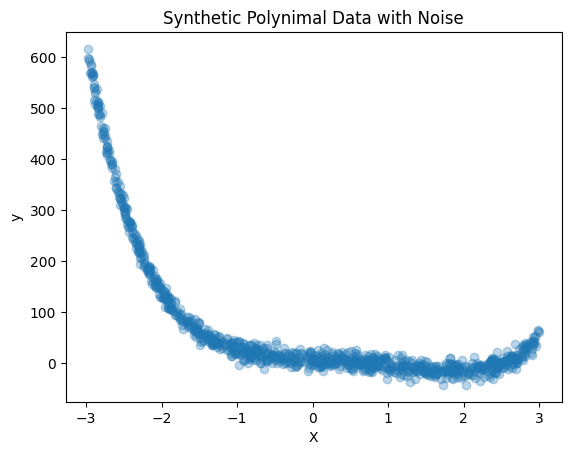

In [17]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.plot()
plt.scatter(X,y,alpha=0.3)
plt.title("Synthetic Polynimal Data with Noise")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test` function from the `sklearn` library for convenience in splitting the data.

In [18]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, y_train = X[:7*X.shape[0] // 10], y[:7*y.shape[0] // 10]
X_test_in_range, y_test_in_range = X[7*X.shape[0] // 10:], y[7*y.shape[0] // 10:]
# TODO: Generate the out-of-range testing set
X_test_out_of_range= (7 - 5) * np.random.random_sample((X_test_in_range.shape[0],)) + 5
y_test_out_of_range = 0.2*X_test_out_of_range**6-0.5*X_test_out_of_range**5+2*X_test_out_of_range**4-5*X_test_out_of_range**3+3*X_test_out_of_range**2-10*X_test_out_of_range+5+np.random.normal(0,10,X_test_in_range.shape[0])

In [19]:
X_train = X_train.reshape(-1, 1)
X_test_in_range = X_test_in_range.reshape(-1, 1)
X_test_out_of_range = X_test_out_of_range.reshape(-1, 1)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test_in_range.shape, y_test_in_range.shape)
print(X_test_out_of_range.shape, y_test_out_of_range.shape)


(700, 1) (700,)
(300, 1) (300,)
(300, 1) (300,)


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

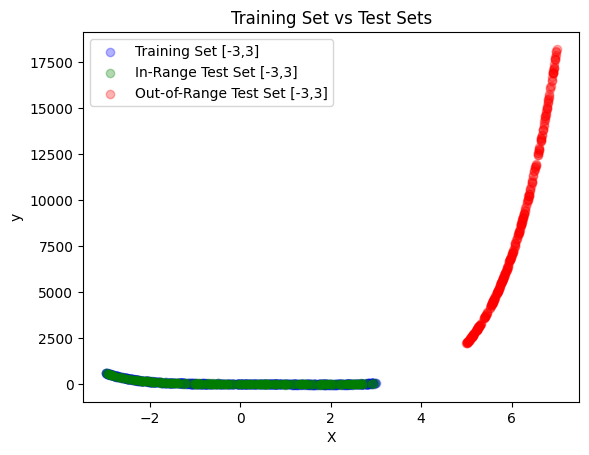

In [21]:
# TODO: Visualize the sets using scatter (or other plots)
plt.plot()
plt.scatter(X_train,y_train, label= 'Training Set [-3,3]', alpha=0.3, c='blue')
plt.scatter(X_test_in_range, y_test_in_range, label='In-Range Test Set [-3,3]', alpha=0.3, c='green')
plt.scatter(X_test_out_of_range, y_test_out_of_range, label='Out-of-Range Test Set [-3,3]', alpha=0.3, c='red')
plt.title("Training Set vs Test Sets")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [22]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    models = {}
    for d in range(2, degree + 1):
        model = make_pipeline(PolynomialFeatures(d), StandardScaler(), LinearRegression())
        model.fit(X, y)
        models[d] = model
    return models

In [23]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
models = train_models(X_train,y_train,degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [24]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses={}
    for d,model in models.items():
      losses[d]=mean_squared_error(y_test,model.predict(X_test))
    return losses

In [25]:
# TODO: Evaluate models on both the train and the test sets.
train_losses = evaluate_models(models, X_train, y_train)
test_losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
test_losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

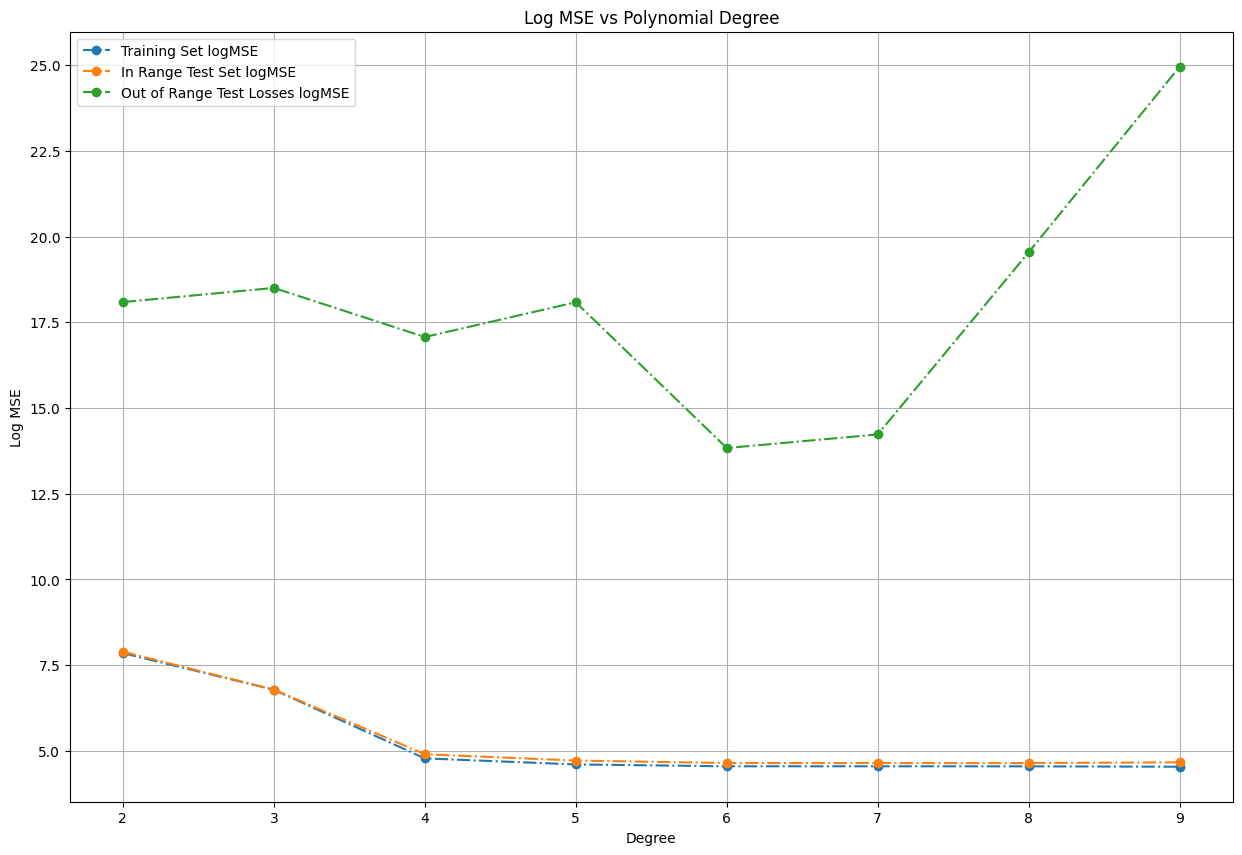

In [26]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
train_losses = np.log(list(train_losses.values()))
test_losses_in_range = np.log(list(test_losses_in_range.values()))
test_losses_out_of_range = np.log(list(test_losses_out_of_range.values()))

# TODO: Plot the log MSE results
plt.figure(figsize=(15, 10))
plt.plot(range(2,degree+1), train_losses, label='Training Set logMSE', marker='o', linestyle='-.')
plt.plot(range(2,degree+1), test_losses_in_range, label='In Range Test Set logMSE', marker='o', linestyle='-.')
plt.plot(range(2,degree+1), test_losses_out_of_range, label='Out of Range Test Losses logMSE', marker='o', linestyle='-.')

plt.title('Log MSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('Log MSE')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# TODO: Print each model loss on the training and the two test sets
print(f"{'Degree':<10}{'Train MSE':<20}{'In-Range Test MSE':<20}{'Out-of-Range Test MSE'}")
for i in range(2,degree+1):
    print(f"{i:<10}{train_losses[i-2]:<20.3f}{test_losses_in_range[i-2]:<20.3f}{test_losses_out_of_range[i-2]:.3f}")

Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE
2         7.848               7.890               18.093
3         6.780               6.782               18.506
4         4.776               4.898               17.073
5         4.600               4.713               18.087
6         4.546               4.640               13.833
7         4.546               4.640               14.230
8         4.545               4.639               19.547
9         4.533               4.661               24.961


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** As the model degree increases, the training loss decreases, meaning the model's bias is reduced, but it starts to overfit the data after a certain degree. The in-range test loss is lowest with degree 6, showing that this degree strikes the best balance between bias and variance. After degree 6, the out-of-range test losses also increases, meaning the model is approaching high variance and doesn't generalize well on unseen data, so degrees 6 seem to be the best choice.</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** As I answered in the previous question,with the the polynomial degree increaseing, the model fits the training data better, reducing underfitting, but it also starts to overfit, especially at higher degrees, where the test loss increases. This shows that more complex models can capture too much noise, making them perform poorly on new data. In order to find the best model and degree we can choose the model with the lowest MSE, which in this case was degree 6.</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [79]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
df=pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [80]:
# TODO: you can use .info() and .description()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [82]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

df = pd.get_dummies(df)

In [83]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

Fit a linear regressor to the data.

In [84]:
# TODO: Use sklearn
basic_model = LinearRegression()
basic_model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

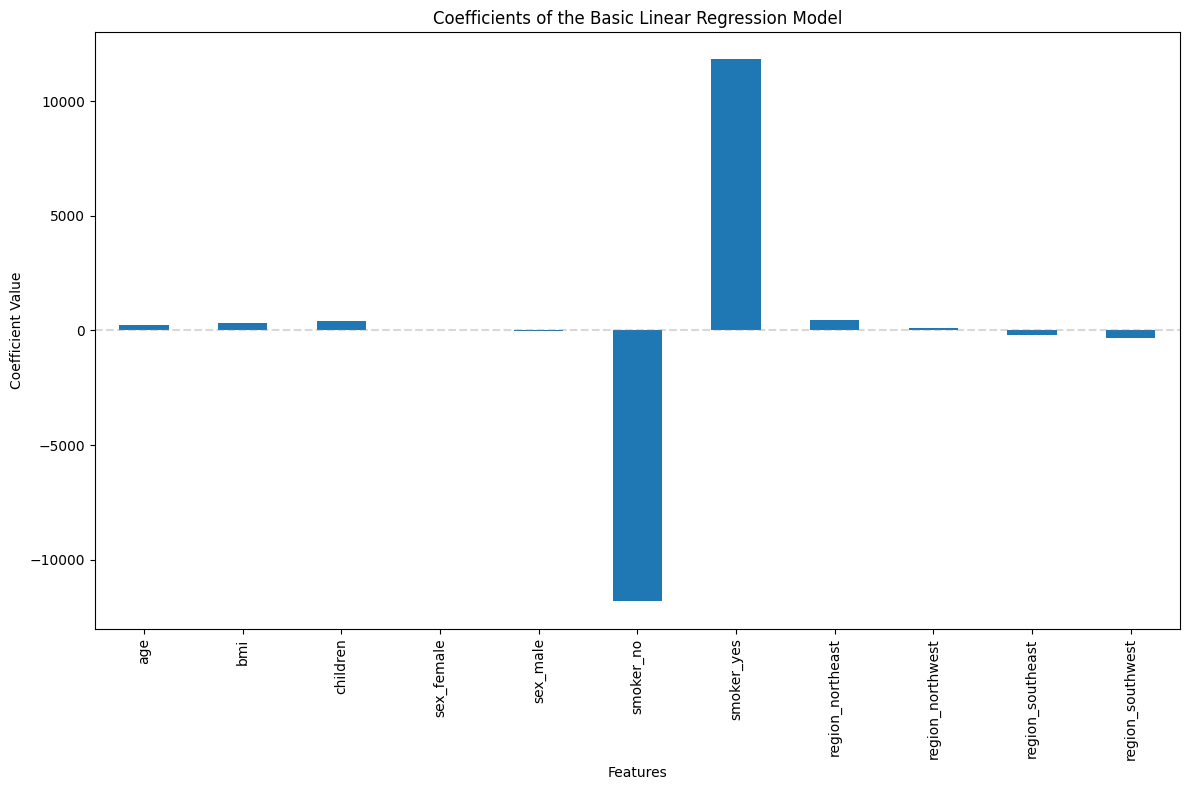

In [85]:
# TODO:
basic_coefficients = pd.Series(basic_model.coef_, index=X.columns)

plt.figure(figsize=(12, 8))
basic_coefficients.plot(kind='bar')
plt.title('Coefficients of the Basic Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.tight_layout()
plt.axhline(y=0, color='grey', linestyle='--', alpha = 0.3)
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [86]:
# TODO: Use Lasso from sklearn library
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [87]:
# TODO: Use Ridge from sklearn library
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

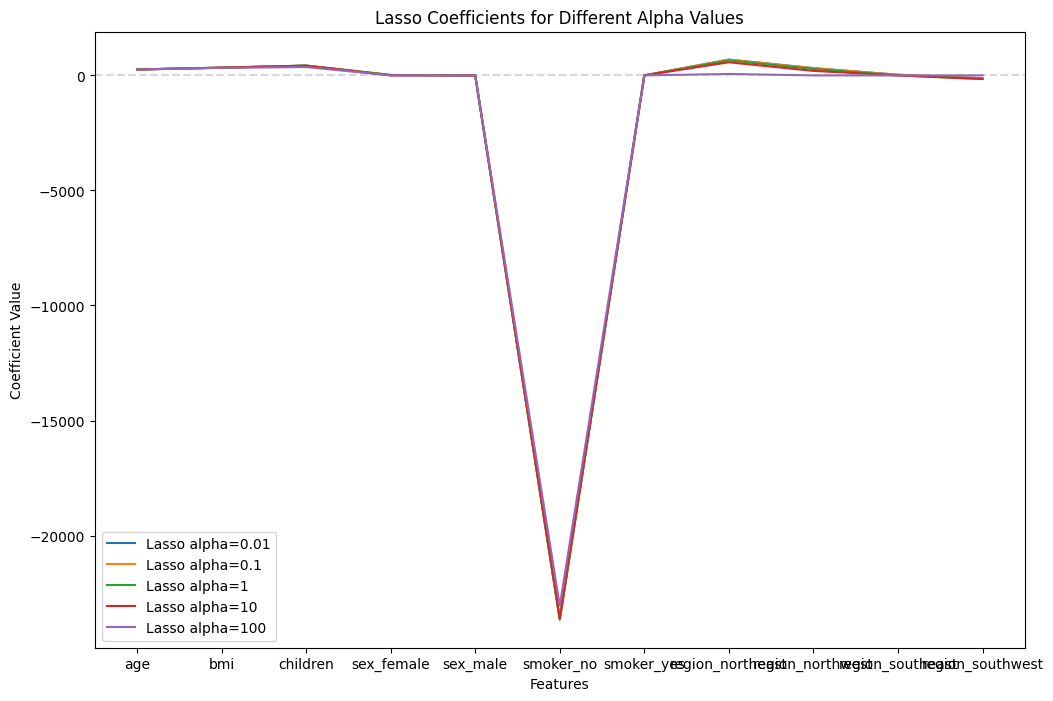

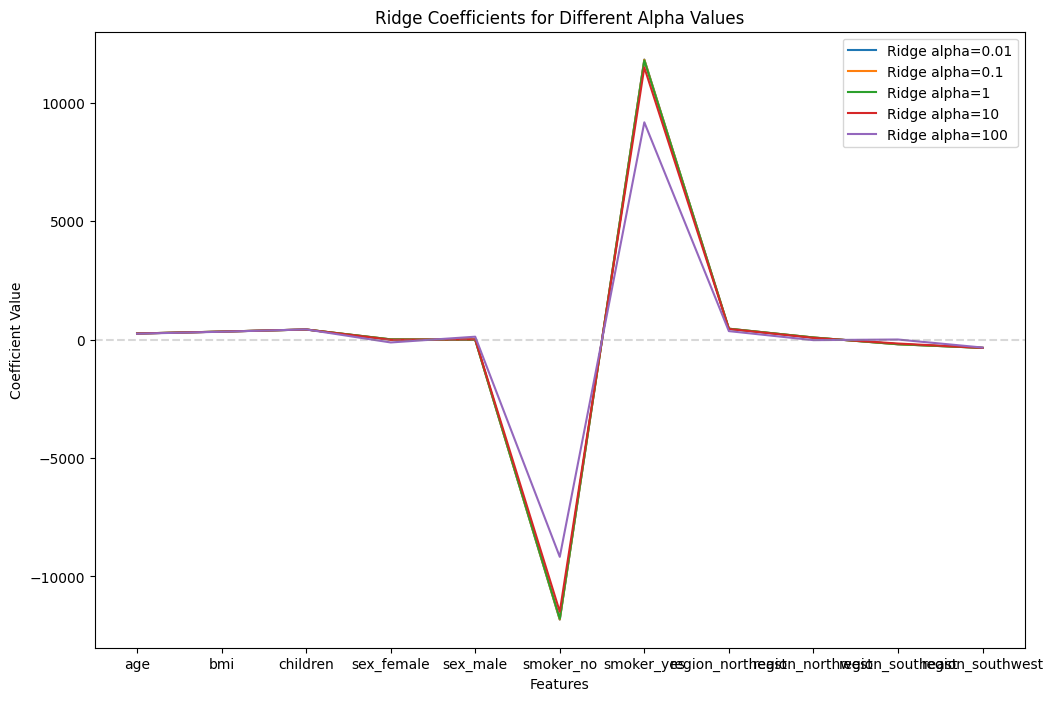

Lasso MAPE for alpha=0.01: 0.4241
Ridge MAPE for alpha=0.01: 0.4241
Lasso MAPE for alpha=0.1: 0.4241
Ridge MAPE for alpha=0.1: 0.4242
Lasso MAPE for alpha=1: 0.4242
Ridge MAPE for alpha=1: 0.4252
Lasso MAPE for alpha=10: 0.4246
Ridge MAPE for alpha=10: 0.4355
Lasso MAPE for alpha=100: 0.4305
Ridge MAPE for alpha=100: 0.5420


In [88]:
# TODO: Use folding methods and mape from sklearn library
alpha_values = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_coefficients = {}
ridge_coefficients = {}
lasso_mape_scores = []
ridge_mape_scores = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_coefficients[alpha] = lasso_model.coef_
    lasso_mape = -cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    lasso_mape_scores.append(np.mean(lasso_mape))

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefficients[alpha] = ridge_model.coef_
    ridge_mape = -cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    ridge_mape_scores.append(np.mean(ridge_mape))

plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    plt.plot(X_train.columns, lasso_coefficients[alpha], label=f'Lasso alpha={alpha}')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    plt.plot(X_train.columns, ridge_coefficients[alpha], label=f'Ridge alpha={alpha}')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

for i, alpha in enumerate(alpha_values):
    print(f"Lasso MAPE for alpha={alpha}: {lasso_mape_scores[i]:.4f}")
    print(f"Ridge MAPE for alpha={alpha}: {ridge_mape_scores[i]:.4f}")

Add extra variables to dataset to make model more complex, then compare the results.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.128e+09, tolerance: 1.202e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.162e+09, tolerance: 1.233e

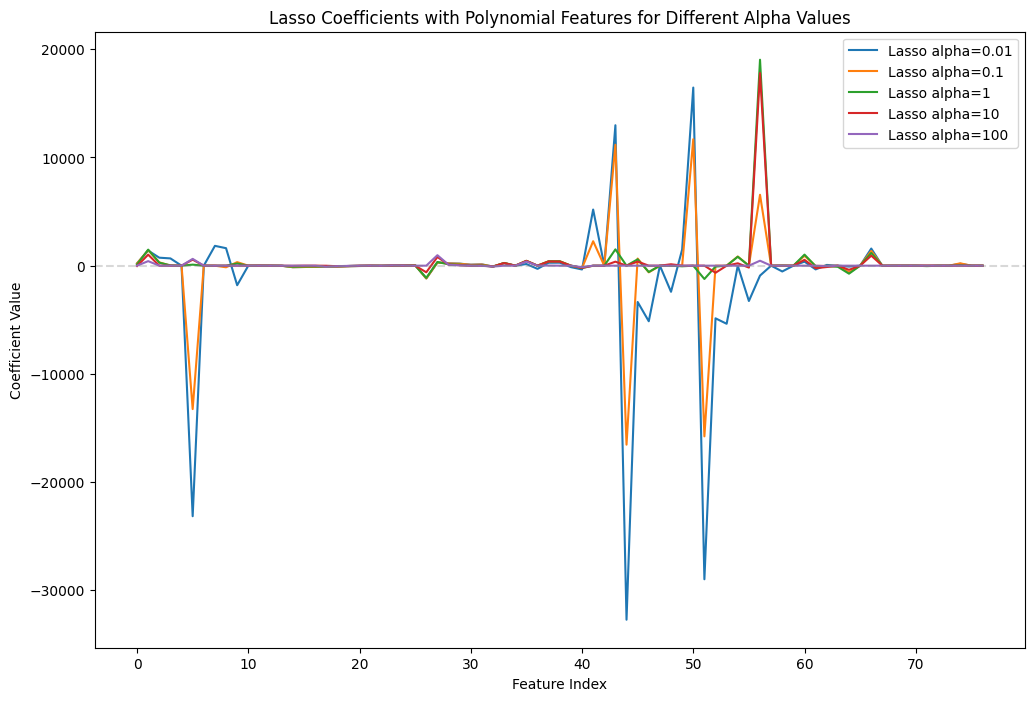

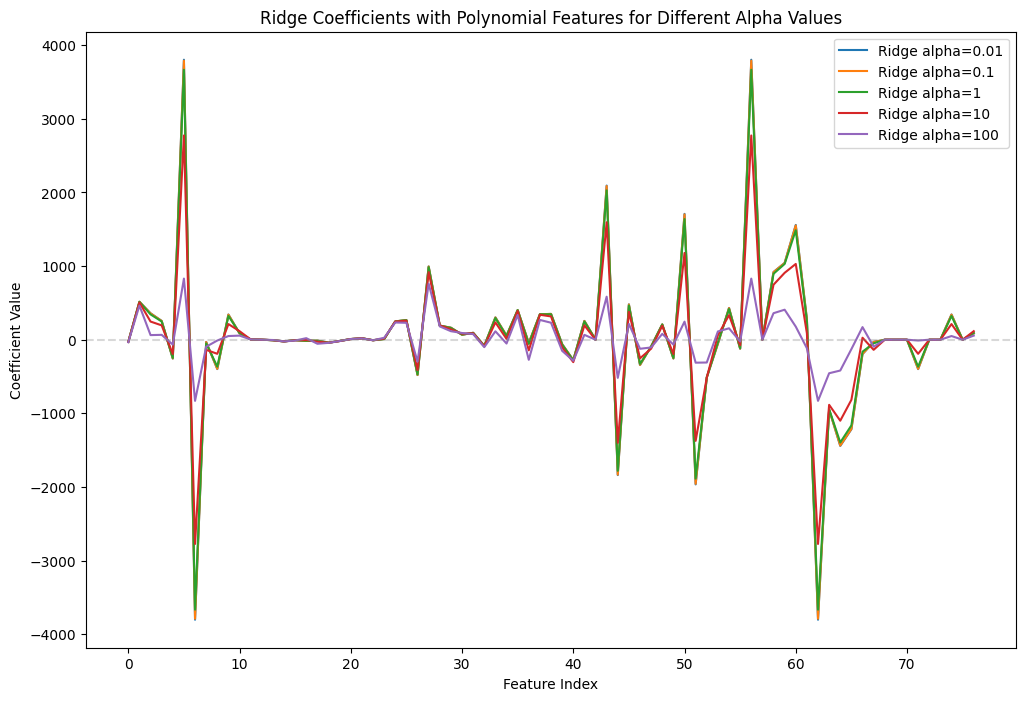

Lasso MAPE with Polynomial Features for alpha=0.01: 0.3041
Ridge MAPE with Polynomial Features for alpha=0.01: 0.3041
Lasso MAPE with Polynomial Features for alpha=0.1: 0.3041
Ridge MAPE with Polynomial Features for alpha=0.1: 0.3039
Lasso MAPE with Polynomial Features for alpha=1: 0.3034
Ridge MAPE with Polynomial Features for alpha=1: 0.3017
Lasso MAPE with Polynomial Features for alpha=10: 0.2977
Ridge MAPE with Polynomial Features for alpha=10: 0.2887
Lasso MAPE with Polynomial Features for alpha=100: 0.2752
Ridge MAPE with Polynomial Features for alpha=100: 0.2761


In [89]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

alpha_values = [0.01, 0.1, 1, 10, 100]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_mape_scores_poly = []
ridge_mape_scores_poly = []

lasso_coefficients_poly = {}
ridge_coefficients_poly = {}

# Lasso with Polynomial Features
for alpha in alpha_values:
    lasso_model_poly = Lasso(alpha=alpha, max_iter=10000)
    lasso_model_poly.fit(X_train_poly, y_train)
    lasso_coefficients_poly[alpha] = lasso_model_poly.coef_
    lasso_mape_poly = -cross_val_score(lasso_model_poly, X_train_poly, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    lasso_mape_scores_poly.append(np.mean(lasso_mape_poly))

# Ridge with Polynomial Features
for alpha in alpha_values:
    ridge_model_poly = Ridge(alpha=alpha, max_iter=10000)
    ridge_model_poly.fit(X_train_poly, y_train)
    ridge_coefficients_poly[alpha] = ridge_model_poly.coef_
    ridge_mape_poly = -cross_val_score(ridge_model_poly, X_train_poly, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    ridge_mape_scores_poly.append(np.mean(ridge_mape_poly))

# Visualize the coefficients of Lasso with polynomial features
plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    plt.plot(np.arange(len(lasso_coefficients_poly[alpha])), lasso_coefficients_poly[alpha], label=f'Lasso alpha={alpha}')
plt.title('Lasso Coefficients with Polynomial Features for Different Alpha Values')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Index')
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# Visualize the coefficients of Ridge with polynomial features
plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    plt.plot(np.arange(len(ridge_coefficients_poly[alpha])), ridge_coefficients_poly[alpha], label=f'Ridge alpha={alpha}')
plt.title('Ridge Coefficients with Polynomial Features for Different Alpha Values')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Index')
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# Print MAPE scores for Lasso and Ridge with Polynomial Features
for i, alpha in enumerate(alpha_values):
    print(f"Lasso MAPE with Polynomial Features for alpha={alpha}: {lasso_mape_scores_poly[i]:.4f}")
    print(f"Ridge MAPE with Polynomial Features for alpha={alpha}: {ridge_mape_scores_poly[i]:.4f}")

Report your best model with its evaluated results.

In [91]:
# TODO: Print each model's loss on the training and the test set.
best_lasso_alpha = None
best_ridge_alpha = None
best_lasso_mape = float('inf')
best_ridge_mape = float('inf')

# Variables to store the best models
best_lasso_model = None
best_ridge_model = None

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_mape = mean_absolute_percentage_error(y_train, train_preds)
    test_mape = mean_absolute_percentage_error(y_test, test_preds)

    print(f'{model_name} MAPE on Training Set: {train_mape:.4f}')
    print(f'{model_name} MAPE on Test Set: {test_mape:.4f}')

    return train_mape, test_mape

# Lasso: Iterate over alpha values and evaluate the model
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)

    _, lasso_test_mape = evaluate_model(lasso_model, X_train_poly, X_test_poly, y_train, y_test, f"Lasso (alpha={alpha})")

    if lasso_test_mape < best_lasso_mape:
        best_lasso_mape = lasso_test_mape
        best_lasso_alpha = alpha
        best_lasso_model = lasso_model

# Ridge: Iterate over alpha values and evaluate the model
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, max_iter=10000)
    ridge_model.fit(X_train_poly, y_train)

    _, ridge_test_mape = evaluate_model(ridge_model, X_train_poly, X_test_poly, y_train, y_test, f"Ridge (alpha={alpha})")

    if ridge_test_mape < best_ridge_mape:
        best_ridge_mape = ridge_test_mape
        best_ridge_alpha = alpha
        best_ridge_model = ridge_model

# Compare the best model based on Test MAPE
if lasso_test_mape < ridge_test_mape:
    print(f"\nThe best model is Lasso with alpha={best_lasso_alpha} and Test MAPE: {lasso_test_mape:.4f}")
else:
    print(f"\nThe best model is Ridge with alpha={best_ridge_alpha} and Test MAPE: {ridge_test_mape:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso (alpha=0.01) MAPE on Training Set: 0.2940
Lasso (alpha=0.01) MAPE on Test Set: 0.3020


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso (alpha=0.1) MAPE on Training Set: 0.2940
Lasso (alpha=0.1) MAPE on Test Set: 0.3020


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso (alpha=1) MAPE on Training Set: 0.2935
Lasso (alpha=1) MAPE on Test Set: 0.3011
Lasso (alpha=10) MAPE on Training Set: 0.2897
Lasso (alpha=10) MAPE on Test Set: 0.2940
Lasso (alpha=100) MAPE on Training Set: 0.2700
Lasso (alpha=100) MAPE on Test Set: 0.2771
Ridge (alpha=0.01) MAPE on Training Set: 0.2940
Ridge (alpha=0.01) MAPE on Test Set: 0.3020
Ridge (alpha=0.1) MAPE on Training Set: 0.2938
Ridge (alpha=0.1) MAPE on Test Set: 0.3018
Ridge (alpha=1) MAPE on Training Set: 0.2921
Ridge (alpha=1) MAPE on Test Set: 0.3002
Ridge (alpha=10) MAPE on Training Set: 0.2815
Ridge (alpha=10) MAPE on Test Set: 0.2899
Ridge (alpha=100) MAPE on Training Set: 0.2706
Ridge (alpha=100) MAPE on Test Set: 0.2781

The best model is Lasso with alpha=100 and Test MAPE: 0.2771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** L1 (Lasso) and L2 (Ridge) regularization affect weight distribution and sparsity differently. Lasso tends to push some of the model's weights (coefficients) exactly to zero, which creates sparsity by effectively removing less important features, making it useful for feature selection. In contrast, Ridge shrinks the weights but does not set any to zero, meaning it reduces the magnitude of the coefficients without eliminating them. As a result, Lasso leads to sparse models, while Ridge retains all features with smaller, non-zero coefficients, resulting in a more spread-out weight distribution in Lasso and uniformly small coefficients in Ridge.</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** The regularization parameter (α) affects the model by controlling how much penalty is applied to the coefficients. When α is small, the regularization is weak, so most features are kept with larger coefficients, and the model behaves like normal regression. As
α increases, the regularization becomes stronger, shrinking the coefficients. In Lasso, higher α can even push some coefficients to zero, effectively removing certain features from the model, which makes it more interpretable by selecting only the most important features. In Ridge, it reduces the magnitude of all coefficients but keeps them non-zero, which can prevent overfitting while retaining all features. This helps the model avoid being too complex, but it doesn't make it as sparse or easy to interpret as Lasso. Overall, increasing α can improve the model's explainability by simplifying the relationships between features and the target, especially in Lasso.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:**
Regularization helps control the complexity of models, especially after dimension expansion like using polynomial features. Without regularization, expanding dimensions can lead to overfitting because the model tries to fit every detail, including noise. L1 makes the model simpler by setting some coefficients to zero, reducing unnecessary features, while L2 keeps all features but shrinks their impact. Regularization basically prevents the model from getting too complex when extra dimensions are added, helping it generalize better.</span>

In [94]:


new_data_file_path = './InsuranceData_test.csv'
new_data = pd.read_csv(new_data_file_path)
new_data = pd.get_dummies(new_data)
new_data_poly = poly.transform(new_data)
predictions = best_ridge_model.predict(new_data_poly)



predictions_df = pd.DataFrame(predictions, columns=['charges'])
predictions_df.to_csv('submission.csv', index=False)

print("Predictions have been saved to 'submission.csv'.")

Predictions have been saved to 'submission.csv'.
